In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # 
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
plastic = pd.read_csv('C:\\Users\\tamba\\Downloads\\Data-Science-Case-Studies-And-Algorithms-master\\Data-Science-Case-Studies-And-Algorithms-master\\17. Forecating\\PlasticSales.csv')

In [24]:
plastic.head()

,Month,Sales
0,Jan-49,742
1,Feb-49,697
2,Mar-49,776
3,Apr-49,898
4,May-49,1030


In [25]:
# Converting the normal index of Amtrak to time stamp 
plastic.index = pd.to_datetime(plastic.Month,format="%b-%y")

In [26]:
colnames = plastic.columns
colnames

Index(['Month', 'Sales'], dtype='object')

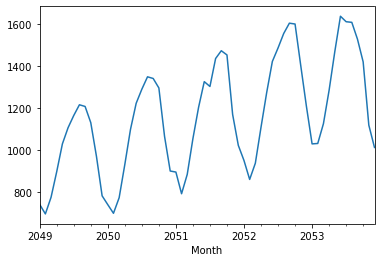

In [27]:
plastic["Sales"].plot() # time series plot 

In [28]:
# Creating a Date column to store the actual Date format for the given Month column
plastic["Date"] = pd.to_datetime(plastic.Month,format="%b-%y")

In [29]:
# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas 

plastic["month"] = plastic.Date.dt.strftime("%b") # month extraction
#Amtrak["Day"] = Amtrak.Date.dt.strftime("%d") # Day extraction
#Amtrak["wkday"] = Amtrak.Date.dt.strftime("%A") # weekday extraction
plastic["year"] =plastic.Date.dt.strftime("%Y") # year extraction

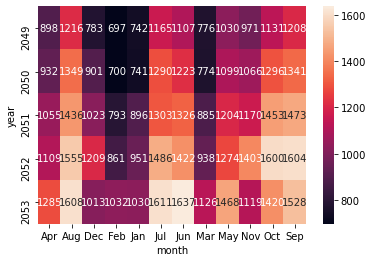

In [30]:
# Some EDA on Time series data 
# Heat map visualization 
heatmap_y_month = pd.pivot_table(data=plastic,values="Sales",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g")

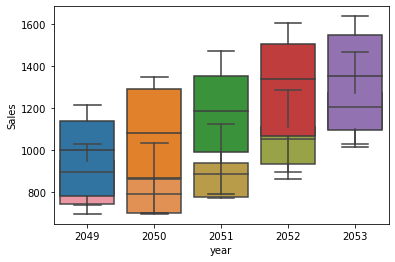

In [31]:
# Boxplot for ever
sns.boxplot(x="month",y="Sales",data=plastic)
sns.boxplot(x="year",y="Sales",data=plastic)

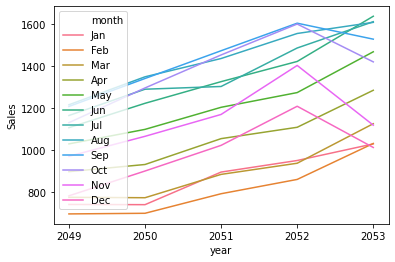

In [32]:
# Line plot for Ridership based on year  and for each month
sns.lineplot(x="year",y="Sales",hue="month",data=plastic)

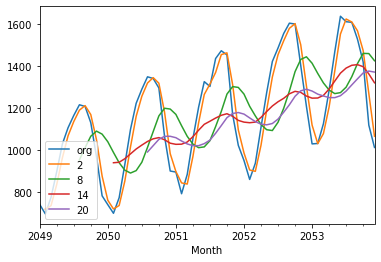

In [33]:
# moving average for the time series to understand better about the trend character in plastic
plastic.Sales.plot(label="org")
for i in range(2,24,6):
    plastic["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

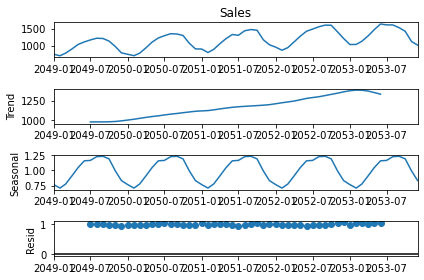

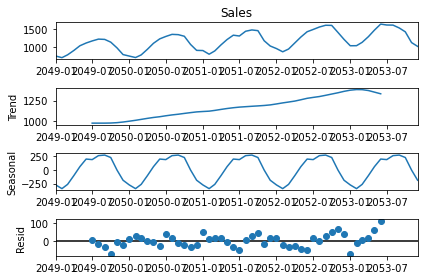

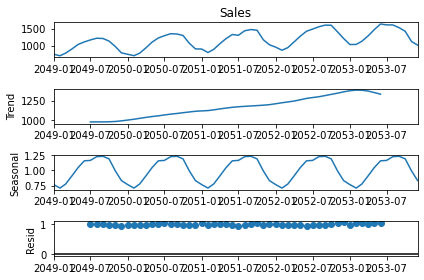

In [34]:
# Time series decomposition plot 
decompose_ts_add = seasonal_decompose(plastic.Sales,model="additive")
decompose_ts_add.plot()
decompose_ts_mul = seasonal_decompose(plastic.Sales,model="multiplicative")
decompose_ts_mul.plot()

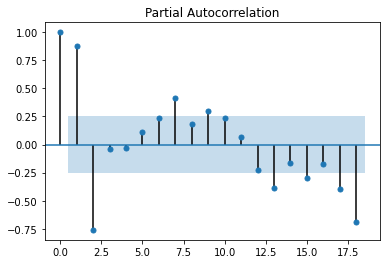

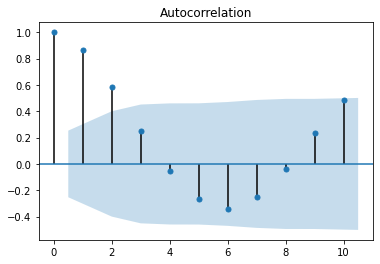

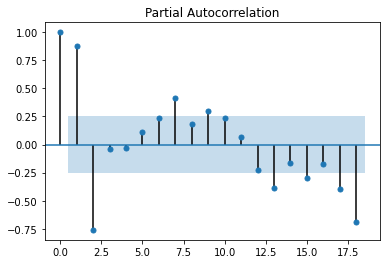

In [35]:
# ACF plots and PACF plots on Original data sets 
tsa_plots.plot_acf(plastic.Sales,lags=10)
tsa_plots.plot_pacf(plastic.Sales)

In [36]:
Train = plastic.head(48)
Test = plastic.tail(12)

In [37]:
# Creating a function to calculate the MAPE value for test data 
def MAPE(pred,org):
    temp = np.abs((pred-org))*100/org
    return np.mean(temp)

In [38]:
# Simple Exponential Method
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Sales) 

17.041518935231107

In [39]:
# Holt method 
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Sales)

101.99506639449883

In [40]:
# Holts winter exponential smoothing with additive seasonality and additive trend
hwe_model_add_add = ExponentialSmoothing(Train["Sales"],seasonal="add",trend="add",seasonal_periods=12,damped=True).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Sales)

14.745559822455968

In [41]:
# Holts winter exponential smoothing with multiplicative seasonality and additive trend
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Sales)

15.002141910017977